# Logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis and Visualization

In [2]:
age = np.array([33,50,52,56,35,58,66,38,53,43,39,58,45,52,36,83,57,39,58,54,65,69,41,43,64,55,46,40,70,36,62,71,38,67,50,68,58,63,60,24,44,55,42,61,49,66,51,65,53,52])
score = np.array([41,37,25,31,43,23,29,41,32,42,42,31,40,35,43,11,33,41,27,36,21,26,42,39,23,21,36,41,25,40,19,19,45,33,29,23,29,30,32,47,36,37,39,27,25,21,35,25,35,35])
result = np.array([1,1,0,0,1,0,0,1,0,1,1,1,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0])

df = pd.DataFrame({'age': age, 'score': score, 'result': result})
df.head()

,age,score,result
0,33,41,1
1,50,37,1
2,52,25,0
3,56,31,0
4,35,43,1


<Axes: xlabel='result', ylabel='count'>

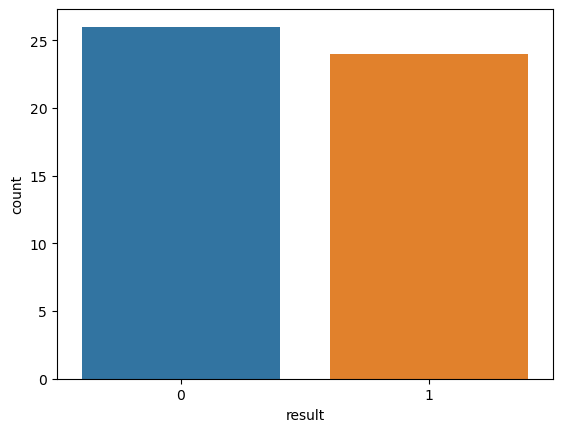

In [3]:
sns.countplot(data=df, x='result')

<Axes: xlabel='result', ylabel='age'>

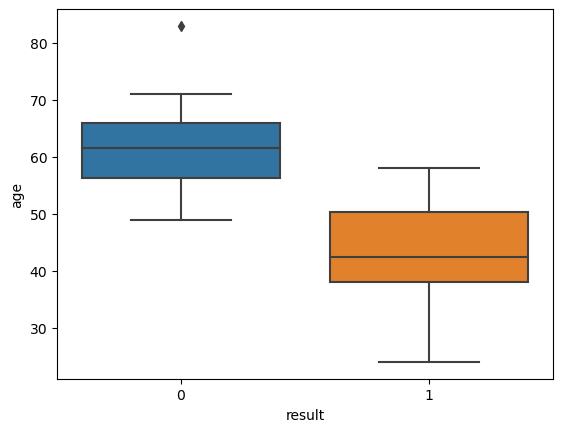

In [4]:
sns.boxplot(data=df, x='result', y='age')

<Axes: xlabel='result', ylabel='score'>

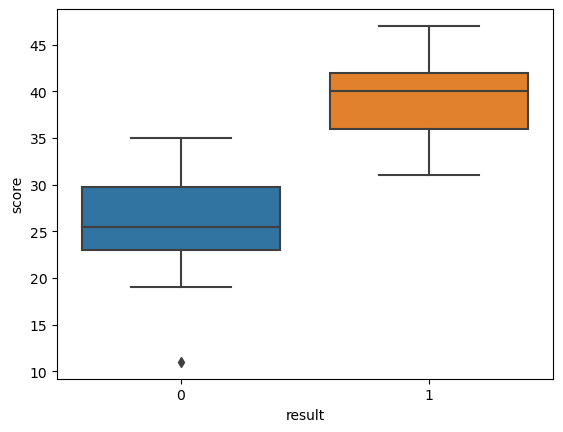

In [5]:
sns.boxplot(data=df, x='result', y='score')

<Axes: xlabel='age', ylabel='score'>

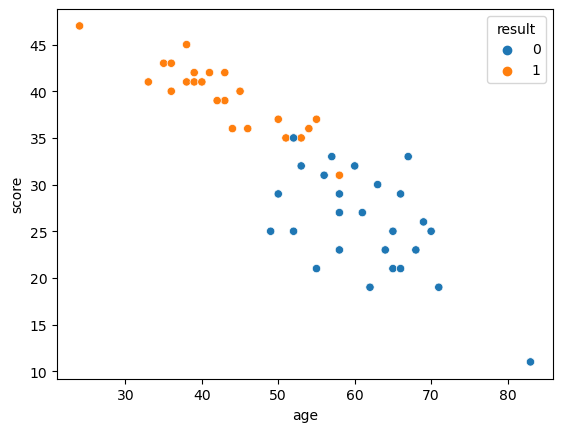

In [6]:
sns.scatterplot(data=df, x='age', y='score', hue='result')

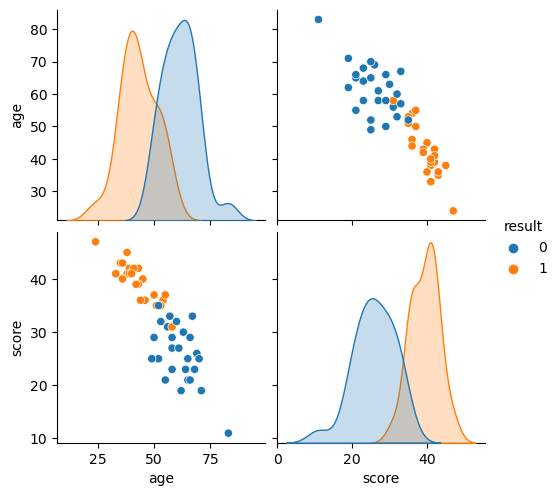

In [7]:
sns.pairplot(df, hue='result')

<Axes: >

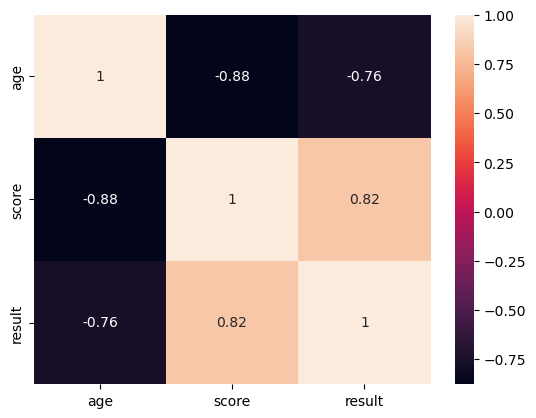

In [8]:
sns.heatmap(df.corr(), annot=True)

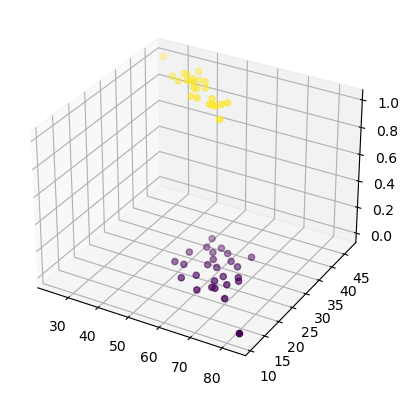

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['score'], df['result'], c=df['result'])

## Creating and training a model

In [10]:
X = df.drop('result', axis=1)
y = df['result']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=99)

In [13]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_model = LogisticRegression()

In [16]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [17]:
log_model.coef_

array([[-1.38958975,  2.07652441]])

### Model Performance on Classification Tasks

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [19]:
y_pred = log_model.predict(scaled_X_test)

In [20]:
accuracy_score(y_test, y_pred)

0.8

In [21]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2, 0],
       [1, 2]], dtype=int64)

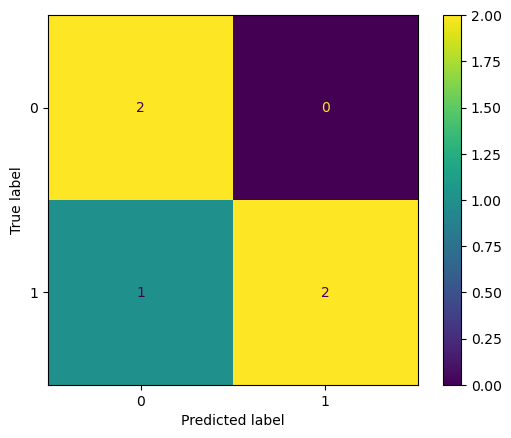

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [24]:
from sklearn.metrics import precision_score, recall_score

In [25]:
precision_score(y_test, y_pred)

1.0

In [26]:
recall_score(y_test, y_pred)

0.6666666666666666